<a href="https://colab.research.google.com/github/KimuYounguWoo/machine-learning-programming/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 데이터셋 에측 모델 만들기


## 데이터 준비 및 전처리

### 데이터 불러오기

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data_tr = pd.read_csv('/content/drive/MyDrive/simp_data/train.csv')
data_te = pd.read_csv('/content/drive/MyDrive/simp_data/test.csv')

### 결측치 확인
이 데이터에서 이상치를 어떻게 처리할 지에 대해서, 확인

In [4]:
data_tr.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

나이 데이터는 생존률에 영향을 미칠 것으로 예상되고, Cabin, 즉 객실 데이터는 이상치가 너무 많아 사용할 수 없을 것으로 예상

In [5]:
# 객실 등급에 따른 생존률

data_tr[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


객실 등급이 높을 수록(1에 가까울수록) 생존률이 높다.

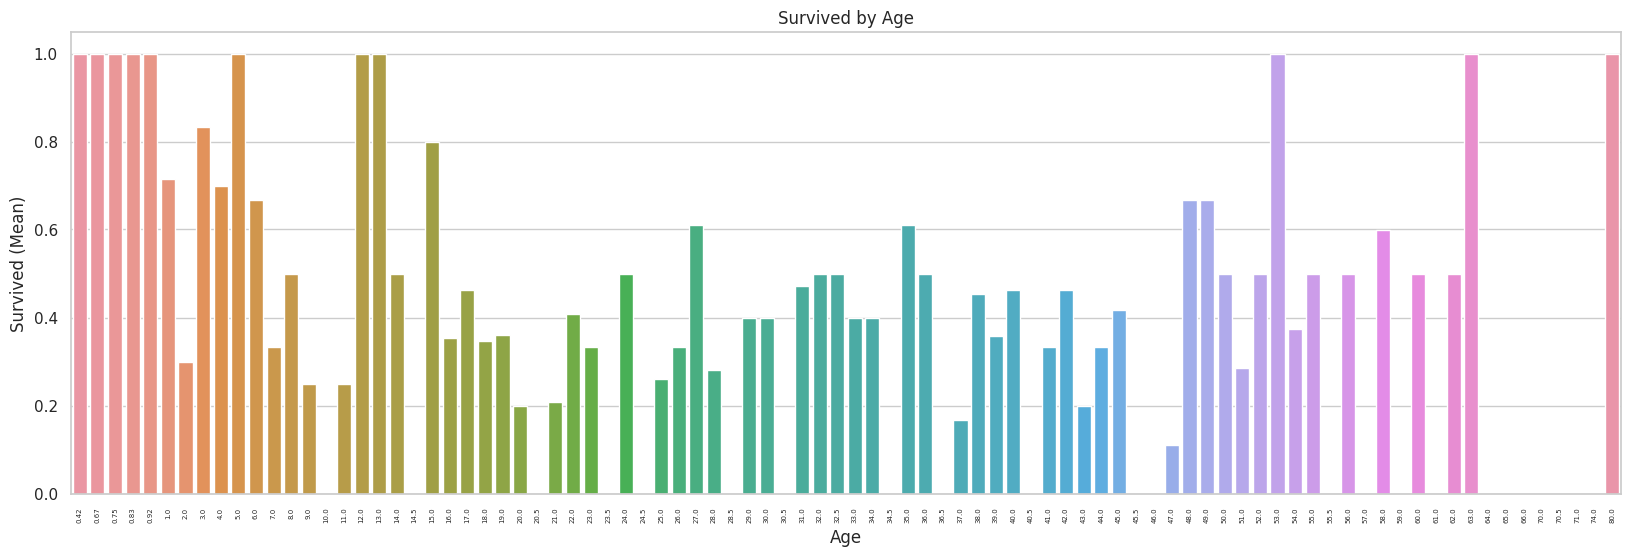

In [6]:
# 나이에 따른 생존률
import seaborn as sns
import matplotlib.pyplot as plt

age_survived_mean = data_tr[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()

sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x='Age', y='Survived', data=age_survived_mean)
plt.xlabel('Age')
plt.ylabel('Survived (Mean)')
plt.title('Survived by Age')
plt.xticks(rotation=90, fontsize = 5)
plt.show()

나이가 매우 어리거나, 많을 경우 생존률이 높은 것을 확인

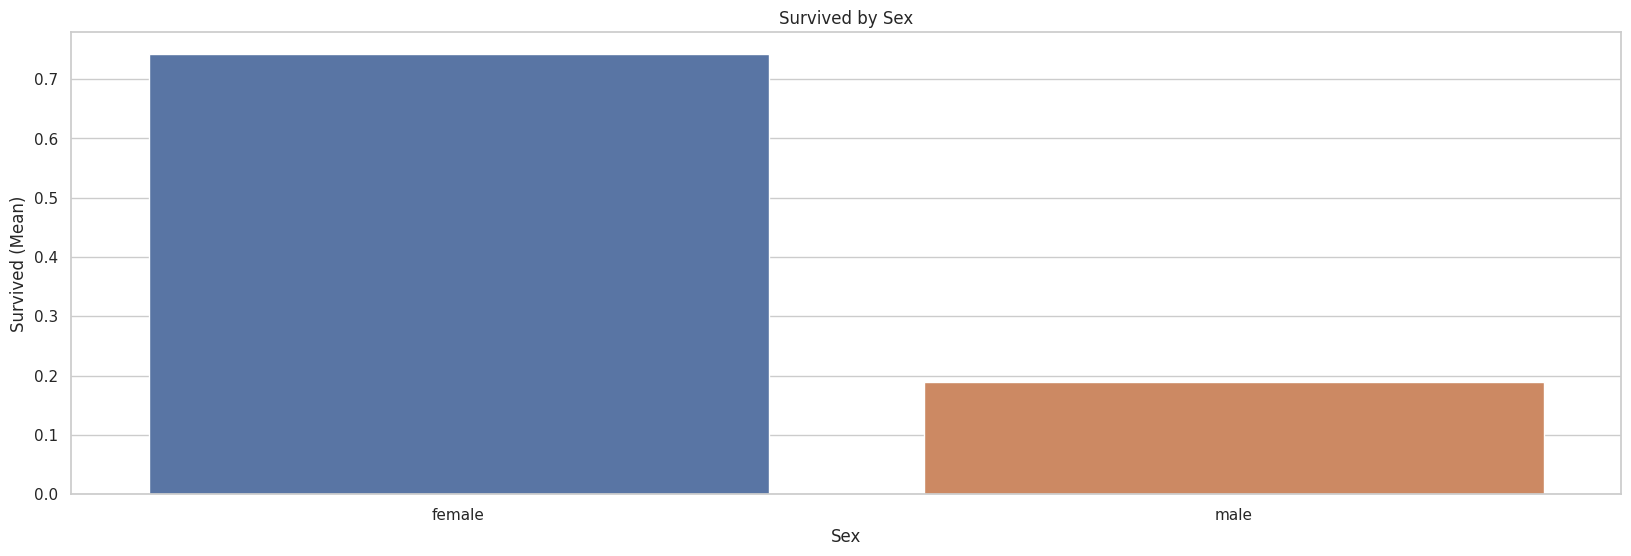

In [7]:


sex_survive_mean = data_tr[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x='Sex', y='Survived', data=sex_survive_mean)
plt.xlabel('Sex')
plt.ylabel('Survived (Mean)')
plt.title('Survived by Sex')
plt.show()

성별에 따른 생존률은 여자가 높은 것으로 추정

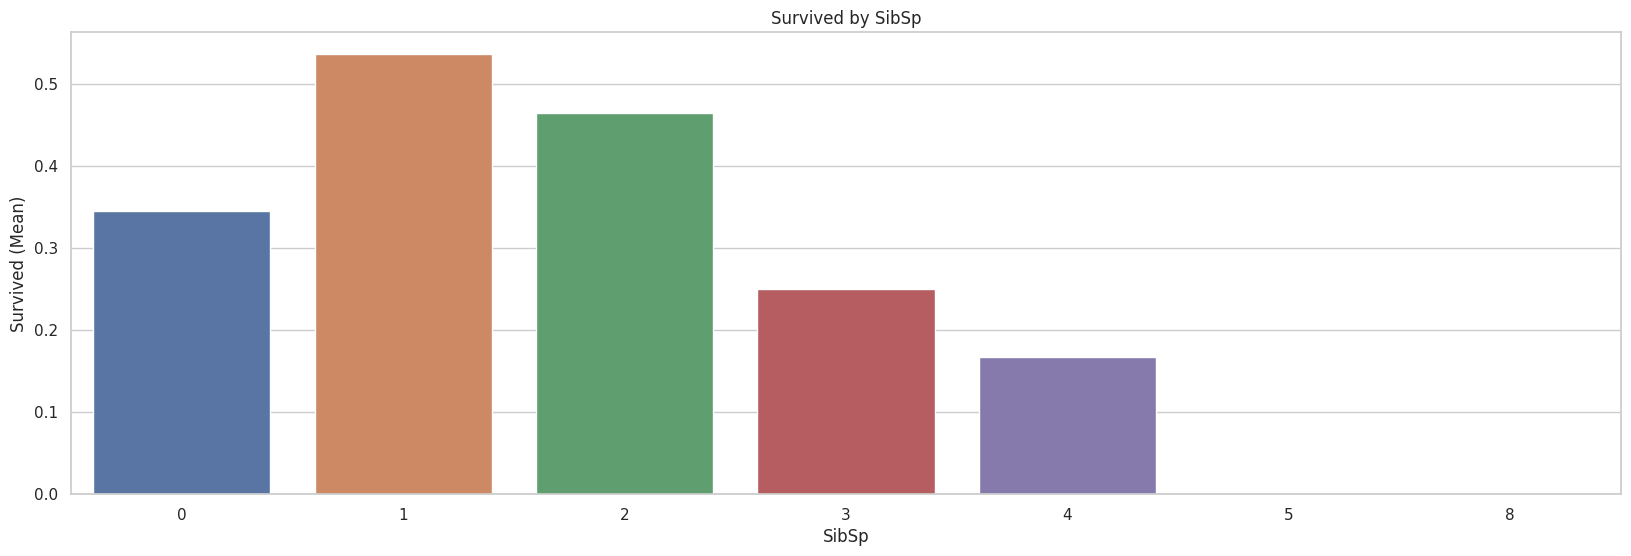

In [8]:
# Parch = 동반한 부모 및 자식의 수
# SibSp = 동반한 형제, 자매, 연인의 수

sib_survived_mean = data_tr[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x='SibSp', y='Survived', data=sib_survived_mean)
plt.xlabel('SibSp')
plt.ylabel('Survived (Mean)')
plt.title('Survived by SibSp')
plt.show()

동반자가 많을 경우, 생존률이 낮아지는 경향

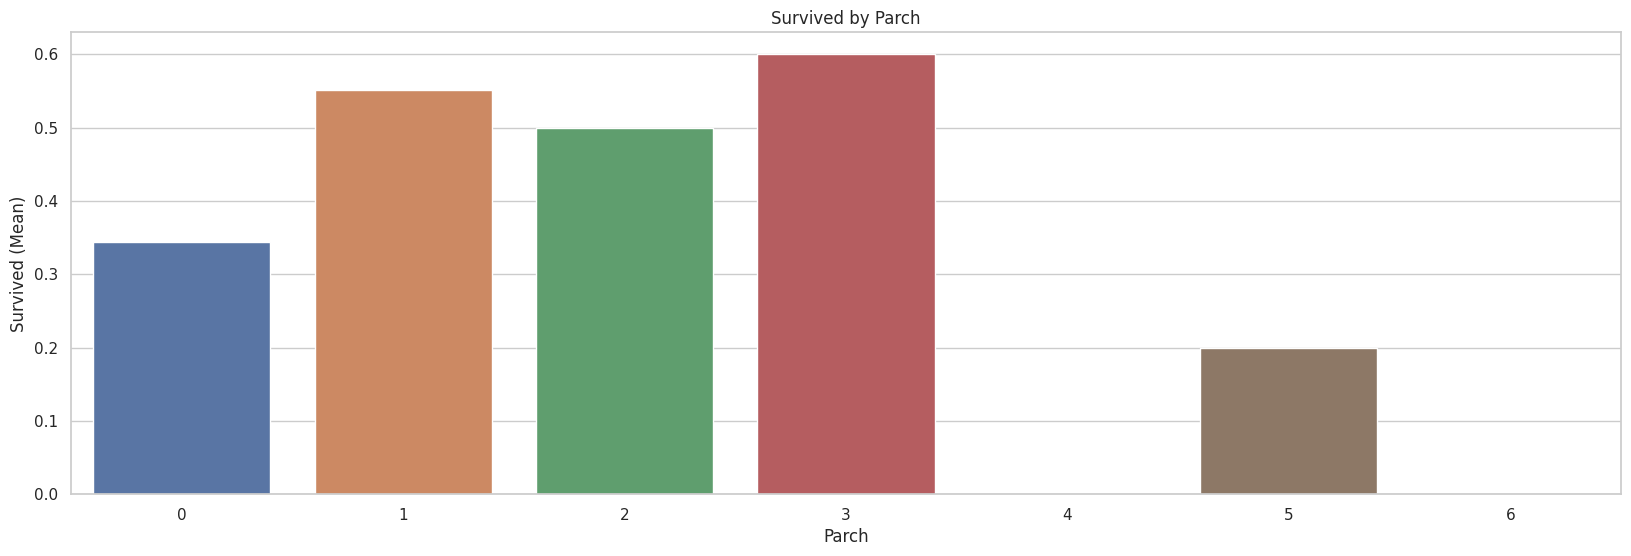

In [9]:
parch_survive_mean = data_tr[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x='Parch', y='Survived', data=parch_survive_mean)
plt.xlabel('Parch')
plt.ylabel('Survived (Mean)')
plt.title('Survived by Parch')
plt.show()

자식이나 부모가 많은 경우, 생존률이 높아지는 경향

### 결론
1. 나이는 생존률에 영향을 주며, 결측치가 많지 않으므로 유의미한 데이터를 통해 결측치를 채워야한다.
2. Cabin(객실) 데이터는 생존률에 영향을 줄 수 있으나, 결측치가 너무 많기에 제거
3. 이름, 승선항, 티켓 고유 번호, 승객 고유 번호, 티켓의 요금 등은, 생존률에 큰 영향을 미치지 않을 것으로 생각하여, 제거

In [10]:
data_tr.drop('PassengerId', axis=1, inplace=True)
data_te.drop('PassengerId', axis=1, inplace=True)

data_tr.drop('Cabin', axis=1, inplace=True)
data_te.drop('Cabin', axis=1, inplace=True)

data_tr.drop('Name', axis=1, inplace=True)
data_te.drop('Name', axis=1, inplace=True)

data_tr.drop('Fare', axis=1, inplace=True)
data_te.drop('Fare', axis=1, inplace=True)

data_tr.drop('Embarked', axis=1, inplace=True)
data_te.drop('Embarked', axis=1, inplace=True)

data_tr.drop('Ticket', axis=1, inplace=True)
data_te.drop('Ticket', axis=1, inplace=True)


In [11]:
data_tr.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [12]:
# 나이가 없는 데이터를 제거하는 방식으로 결측치 제거
data_tr = data_tr.dropna(axis=0)
data_te = data_te.dropna(axis=0)

In [13]:
data_tr.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [14]:
# 성별을 학습을 위해 숫자로 처리
data_tr['Sex']=data_tr['Sex'].apply(lambda x:1 if (x=='female') else 0)
data_te['Sex']=data_te['Sex'].apply(lambda x:1 if (x=='female') else 0)

<ipython-input-14-b8017f59fa35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr['Sex']=data_tr['Sex'].apply(lambda x:1 if (x=='female') else 0)
<ipython-input-14-b8017f59fa35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_te['Sex']=data_te['Sex'].apply(lambda x:1 if (x=='female') else 0)


In [15]:
# 나이를 구간화
# 청소년 : 0
# 청년 : 1
# 장년 : 2
# 중년 : 3
# 노년 : 4

ranges = [0,16,26,36,62,100]

labels = [0,1,2,3,4]

data_tr["Age"]=pd.cut(data_tr['Age'],ranges,right=False,labels=labels)
data_te["Age"]=pd.cut(data_te['Age'],ranges,right=False,labels=labels)

<ipython-input-15-f64f47d243cc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr["Age"]=pd.cut(data_tr['Age'],ranges,right=False,labels=labels)
<ipython-input-15-f64f47d243cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_te["Age"]=pd.cut(data_te['Age'],ranges,right=False,labels=labels)


## 머신러닝


### 모델 생성 및 예측 :: SGD

In [16]:
# 학습 데이터
# input -> Survived 열을 제거하고, to_numpy()
# target -> Survied만

target = data_tr['Survived'].to_numpy()
input = data_tr[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']].to_numpy()

In [17]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(
    input,
    target,
    test_size=0.2,
    random_state=201935231
  )

In [18]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [19]:
from sklearn.linear_model import SGDClassifier


sc = SGDClassifier(loss='log_loss', random_state=201935231)
sc.fit(train_scaled, train_target)
print(f'train score: {sc.score(train_scaled, train_target)}\ntest score: {sc.score(test_scaled, test_target)}')

train score: 0.7338003502626971
test score: 0.7622377622377622


In [20]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=201935231)

train_score = []
test_score = []

classes = np.unique(train_target)

In [21]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

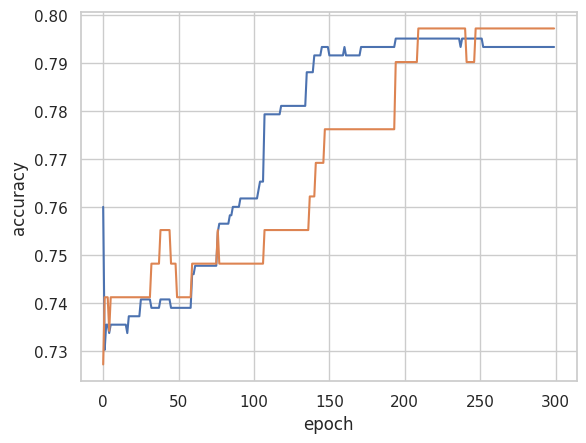

In [22]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


대략 200 epochs에서, 가장 좋은 점수를 보임
<hr>

```
max_iter = 200
```

In [23]:
sc = SGDClassifier(loss='log_loss', max_iter=200, tol = None, random_state=201935231)
sc.fit(train_scaled, train_target)
print(f'train score: {sc.score(train_scaled, train_target)}\ntest score: {sc.score(test_scaled, test_target)}')

train score: 0.8021015761821366
test score: 0.7902097902097902


tol을 설정해서, 반복 학습을 생략

### 결정 트리


In [24]:
from sklearn.tree import DecisionTreeClassifier

train_input,test_input,train_target,test_target = train_test_split(
    input,
    target,
    test_size=0.2,
    random_state=201935231
  )

# 결정 트리에서 보기 쉽게, 정규화 X

dt = DecisionTreeClassifier(random_state=201935231)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8669001751313485
0.7832167832167832


훈련 점수가 과도하게 높아, 과대 적합이 의심

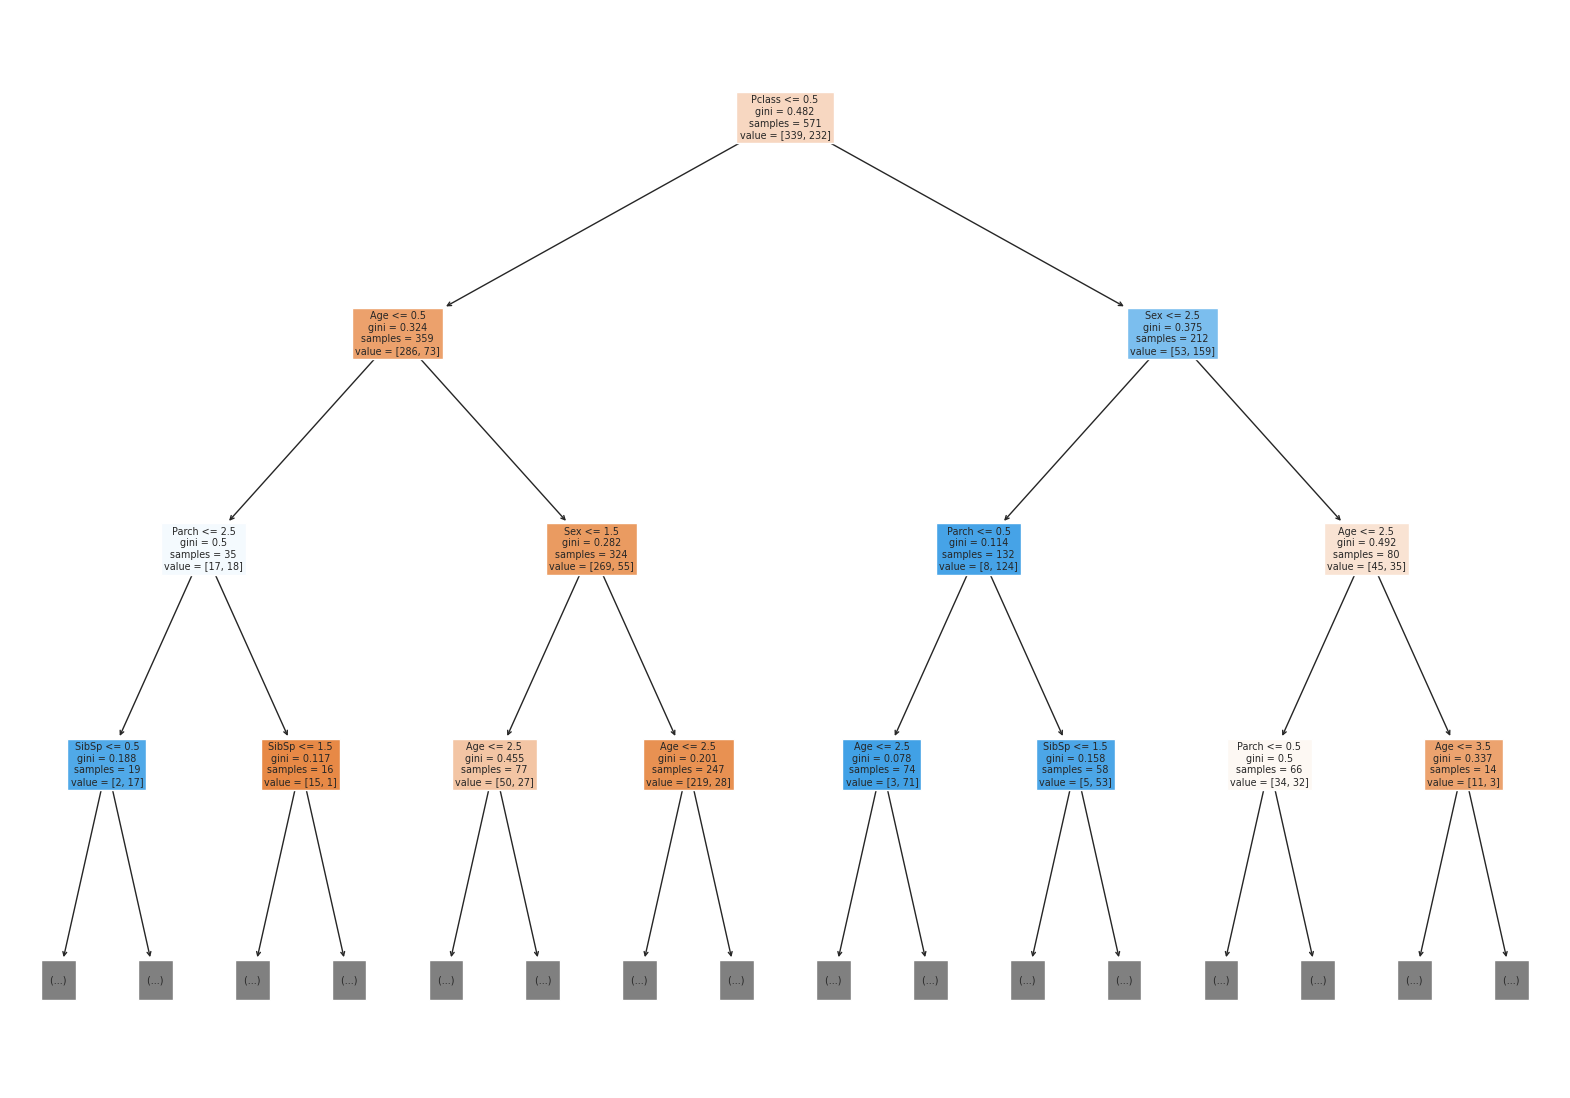

In [25]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,14))
plot_tree(dt, max_depth=3, filled=True, feature_names=['Sex', 'Pclass', 'Age', 'Parch', 'SibSp'])
plt.show()

# 중요하게 생각하는 특성이 5개이므로 깊이를 늘려주자

In [26]:
print(dt.feature_importances_)
# ['Sex', 'Pclass', 'Age', 'Parch', 'SibSp']

[0.20106506 0.47274504 0.1179122  0.15026495 0.05801275]


5개의 특성이 모두 유의미한 특성으로 가정했으므로, 나머지 파라미터를 전부 기본값으로 설정해, 모든 특성을 사용하자

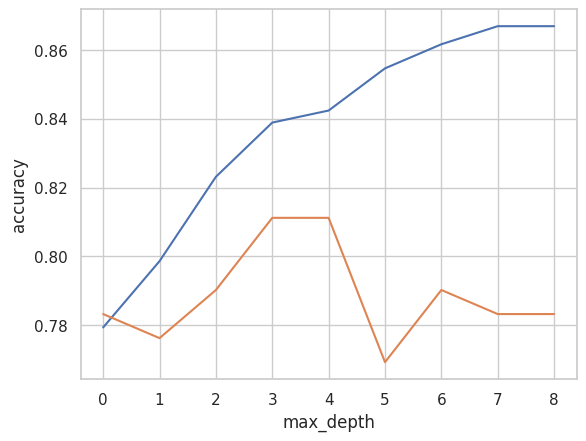

In [27]:
train_score = []
test_score = []

for i in range(1, 10):
  dt = DecisionTreeClassifier(random_state=201935231, max_depth = i)
  dt.fit(train_input, train_target)
  train_score.append(dt.score(train_input, train_target))
  test_score.append(dt.score(test_input, test_target))

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

max_depth = 3 일때 가장 괜찮다.<br>

#### 교차 검증


In [28]:
train_input, test_input, train_target, test_target = train_test_split(
    input, target, test_size=0.2, random_state=201935231)
# 훈련-테스트

sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=201935231)
# 훈련-검증

# 검증 데이터를 훈련데이터의 약 20%로 사용

In [29]:
dt = DecisionTreeClassifier(random_state=201935231)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.8618421052631579
0.8260869565217391


검증 세트를 이용할 경우, 점수는 좋아졌지만 과대적합된다.<br>


훈련 데이터가 많을 수록 높은 점수를 받고, 검증 세트가 낮다면 불안정한 점수를 얻기에 이를 해결하기 위해 교차 검증을 진행

In [30]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

# 기본적으로 5-폴드 교차 검증을 사용

{'fit_time': array([0.00225544, 0.00200152, 0.00157452, 0.00107956, 0.00101185]), 'score_time': array([0.00112629, 0.00100732, 0.00059056, 0.00051951, 0.00055122]), 'test_score': array([0.80869565, 0.79824561, 0.78947368, 0.79824561, 0.78947368])}


In [31]:
print(np.mean(scores['test_score']))
# 점수가 대략 79%가 나옴

0.7968268497330282


### 하이퍼 파라미터 찾기

이런 방식으로 최적의 파라미터를 구해보겠습니다.

In [32]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(1, 10, 1),
          'min_samples_split': range(5, 20, 5)
          # 샘플이 최소 5 ~ 20
          }

# 먼저, 파라미터 설정을 진행합니다

불순도(데이터에 얼마나 잘 섞여있는가 ?)<br>
트리 깊이(분기를 얼마나 남길 것인가 ?)<br>
샘플이 최소 몇개일 때, 분기를 나눌 것인가?


특성이 많지 않으므로, 깊이를 10, 샘플은 5개 기준, 불순도는 최소한으로

In [33]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)
# 그리드 서치 진행
# 이 params로 진행할 교차 검증 횟수는 9*20*10으로, 약 1800회 실행

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(5, 20, 5)})

In [34]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

{'max_depth': 8, 'min_impurity_decrease': 0.0001, 'min_samples_split': 15}
0.8230816170861939


In [35]:
from scipy.stats import uniform, randint

rgen = randint(0, 10)
rgen.rvs(10)

np.unique(rgen.rvs(1000), return_counts=True)

ugen = uniform(0, 1)
ugen.rvs(10)

array([0.29423645, 0.20450953, 0.46519216, 0.34686505, 0.51056692,
       0.30038613, 0.97695506, 0.41037475, 0.43077566, 0.82301849])

In [36]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [37]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=201935231), params,
                        n_iter=100, n_jobs=-1, random_state=201935231)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=201935231),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc151d66ce0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dc151d65bd0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc151d65390>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc151d64550>},
                   random_state=201935231)

In [38]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

{'max_depth': 48, 'min_impurity_decrease': 0.0003678152448531045, 'min_samples_leaf': 3, 'min_samples_split': 11}
0.8178184591914569


In [39]:
dt = gs.best_estimator_

print(dt.score(test_input, test_target))

0.7832167832167832


랜덤 서치와 그리드 서치를 이용해서 구한 최적의 파라미터는
```
{
'max_depth': 48,
'min_impurity_decrease': 0.0003678152448531045, 'min_samples_leaf': 3,
'min_samples_split': 11
}
0.8178184591914569
```
입니다.

In [40]:
dt = DecisionTreeClassifier(random_state=201935231, max_depth=48, min_impurity_decrease = 0.00036, min_samples_split=11)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.8442982456140351
0.8434782608695652


### 앙상블 학습 :: 랜덤 포레스트

In [41]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=201935231)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# 교차 검증과 랜덤 포레스트 분류를 사용하여 점수

0.8712762486083919 0.8108466819221969


과대적합된 것으로 추정, 모델을 조금 더 단순하게 만들어보자

In [42]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.20129078 0.42934182 0.17094746 0.1278547  0.07056524]


In [44]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8126094570928196
0.8712762486083919 0.8108466819221969


### 하이퍼 파라미터
디폴트 값을 기준으로 디폴트 값의 절반을 더하고, 빼며 그리드 서치를 수행

#### 파라미터 예
1. n_estimators: 트리의 개수 -> 일정 수 이상이면 향상이 낮음 **default = 100**
2. max_features: 노드 분할 시, 사용할 특성 집합의 크기, 클 수록 복잡도가 증가 **default = 2**
3. max_depth: 트리의 깊이 제한, 작을 수록 단순해짐 **default = None(제한X)**
4. min_samples_split: 리프 노드가 가질 샘플의 최소 개수, 작을 수록 복잡성 증가 **default = None(제한X)**
5. min_samples_leaf: 생성될 수 있는 최대 리프 노드의 수 제한, 작을 수록 복잡성 증가 **default = None(제한X)**

In [52]:
params = { 'n_estimators' : range(100, 300, 100), # 4
           'max_depth' : range(2, 10, 2), # 5
           'min_samples_leaf' : range(2, 12, 2), # 6
           'min_samples_split' : range(2, 12, 2)
           # 값을 늘려주어서 복잡성을 늘려준다.


           # 파라미터는 과적합이 나왔으니, 모델을 복잡하게 하기위해, 늘려준다
}

랜덤 포레스트에 쓰일 DT의 최대 깊이

In [53]:
rf = RandomForestClassifier(random_state = 201935231, n_jobs = -1)
grid_cv = GridSearchCV(rf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(train_input, train_target)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_jobs=-1,
                                              random_state=201935231),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 10, 2),
                         'min_samples_leaf': range(2, 12, 2),
                         'min_samples_split': range(2, 12, 2),
                         'n_estimators': range(100, 300, 100)})

In [54]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 200}
0.8231285018829797


과적합이 조금 줄어든 것을 확인하고, 부스팅(반복)은 200 이상으로 설정하면, 향상이 의미 없다는 것을 확인 할 수 있다.

### 히스토그램 기반 그레디언트 부스팅

In [61]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=201935231)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8546383738339284 0.8195423340961098


In [56]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=201935231, n_jobs=-1)
print(result.importances_mean)

[0.1145359  0.17968476 0.10245184 0.04290718 0.00770578]


In [57]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=201935231, n_jobs=-1)
print(result.importances_mean)

[ 0.08181818  0.14265734  0.07342657  0.02587413 -0.0034965 ]


In [58]:
hgb.score(test_input, test_target)

0.7972027972027972

### 하이퍼 파라미터
디폴트 값을 기준으로 디폴트 값의 절반을 더하고, 빼며 그리드 서치를 수행

#### 파라미터 예
1. max_iter: 부스팅 회수를 max_iter로 사용
2. max_depth: 트리의 깊이 제한, 작을 수록 단순해짐 **default = None(제한X)**
3. min_samples_leaf: 생성될 수 있는 최대 리프 노드의 수 제한, 작을 수록 복잡성 증가 **default = 20(제한X)**

In [65]:
params = { 'max_iter' : range(100, 300, 100), #
           'max_depth' : range(2, 10, 2), # 5
           'min_samples_leaf' : range(20, 6, -2), # 6
           # 값을 늘려주어서 복잡성을 늘려준다.
           # 파라미터는 과적합이 나왔으니, 모델을 복잡하게 하기위해, 늘려준다
}

In [66]:
hgb = HistGradientBoostingClassifier(random_state=201935231)
grid_cv = GridSearchCV(hgb, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(train_input, train_target)

GridSearchCV(cv=3,
             estimator=HistGradientBoostingClassifier(random_state=201935231),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 10, 2),
                         'max_iter': range(100, 300, 100),
                         'min_samples_leaf': range(20, 6, -2)})

In [67]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 2, 'max_iter': 200, 'min_samples_leaf': 8}
0.8336180766051253


과적합을 다소 해결한것으로 확인